In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
data = pd.read_csv('BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
data.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,5
age,0
dis,0
rad,0
tax,0


In [ ]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
print(np.shape(data))

(506, 14)


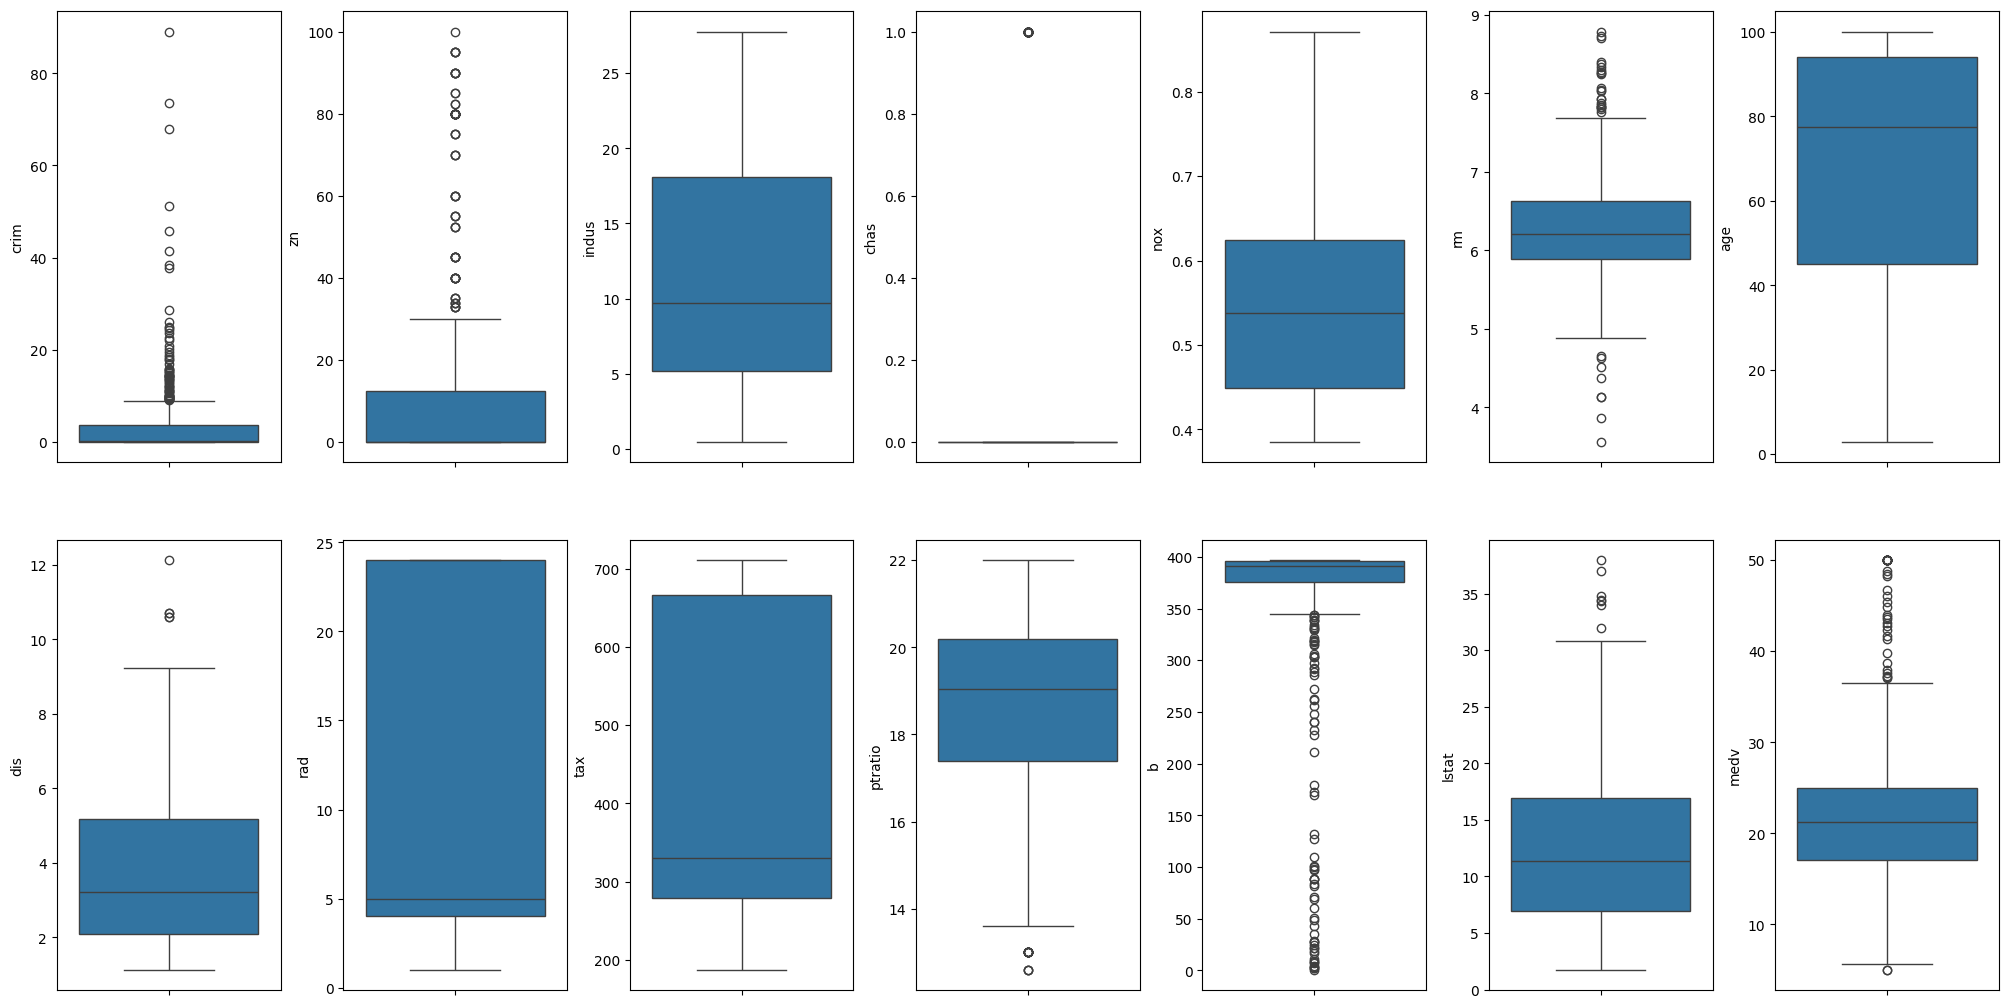

In [ ]:
#check for outliers
fig,axs = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k,data=data,ax=axs[index])
    index += 1
    plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)


In [ ]:
#from above graph we can see that for crim,zn,rm,b have more outliers

In [ ]:
#frequency of outliers
for k,v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3-q1
    v_col=v[(v<=q1-1.5*iqr)|(v>=q3+1.5*iqr)]
    perc = np.shape(v_col)[0]*100/np.shape(data)[0]
    print("Column %s outliers = %.2f%%" %(k,perc))


Column crim outliers = 13.04%
Column zn outliers = 13.44%
Column indus outliers = 0.00%
Column chas outliers = 100.00%
Column nox outliers = 0.00%
Column rm outliers = 5.93%
Column age outliers = 0.00%
Column dis outliers = 0.99%
Column rad outliers = 0.00%
Column tax outliers = 0.00%
Column ptratio outliers = 2.96%
Column b outliers = 15.22%
Column lstat outliers = 1.38%
Column medv outliers = 7.91%


In [ ]:
#Outliers are data points that significantly deviate from the general trend of the data. here we got to know that the percentage of outliers is mostly higher in chas,b,zn & crim coloumns.
#where the outlier percentage is higher the data inacuracy is higher

In [ ]:
#Let's remove MEDV outliers (MEDV = 50.0) before plotting more distributions

data = data[~(data['medv'] >= 50.0)]
print(np.shape(data))

(490, 14)


In [ ]:
#medv distributions

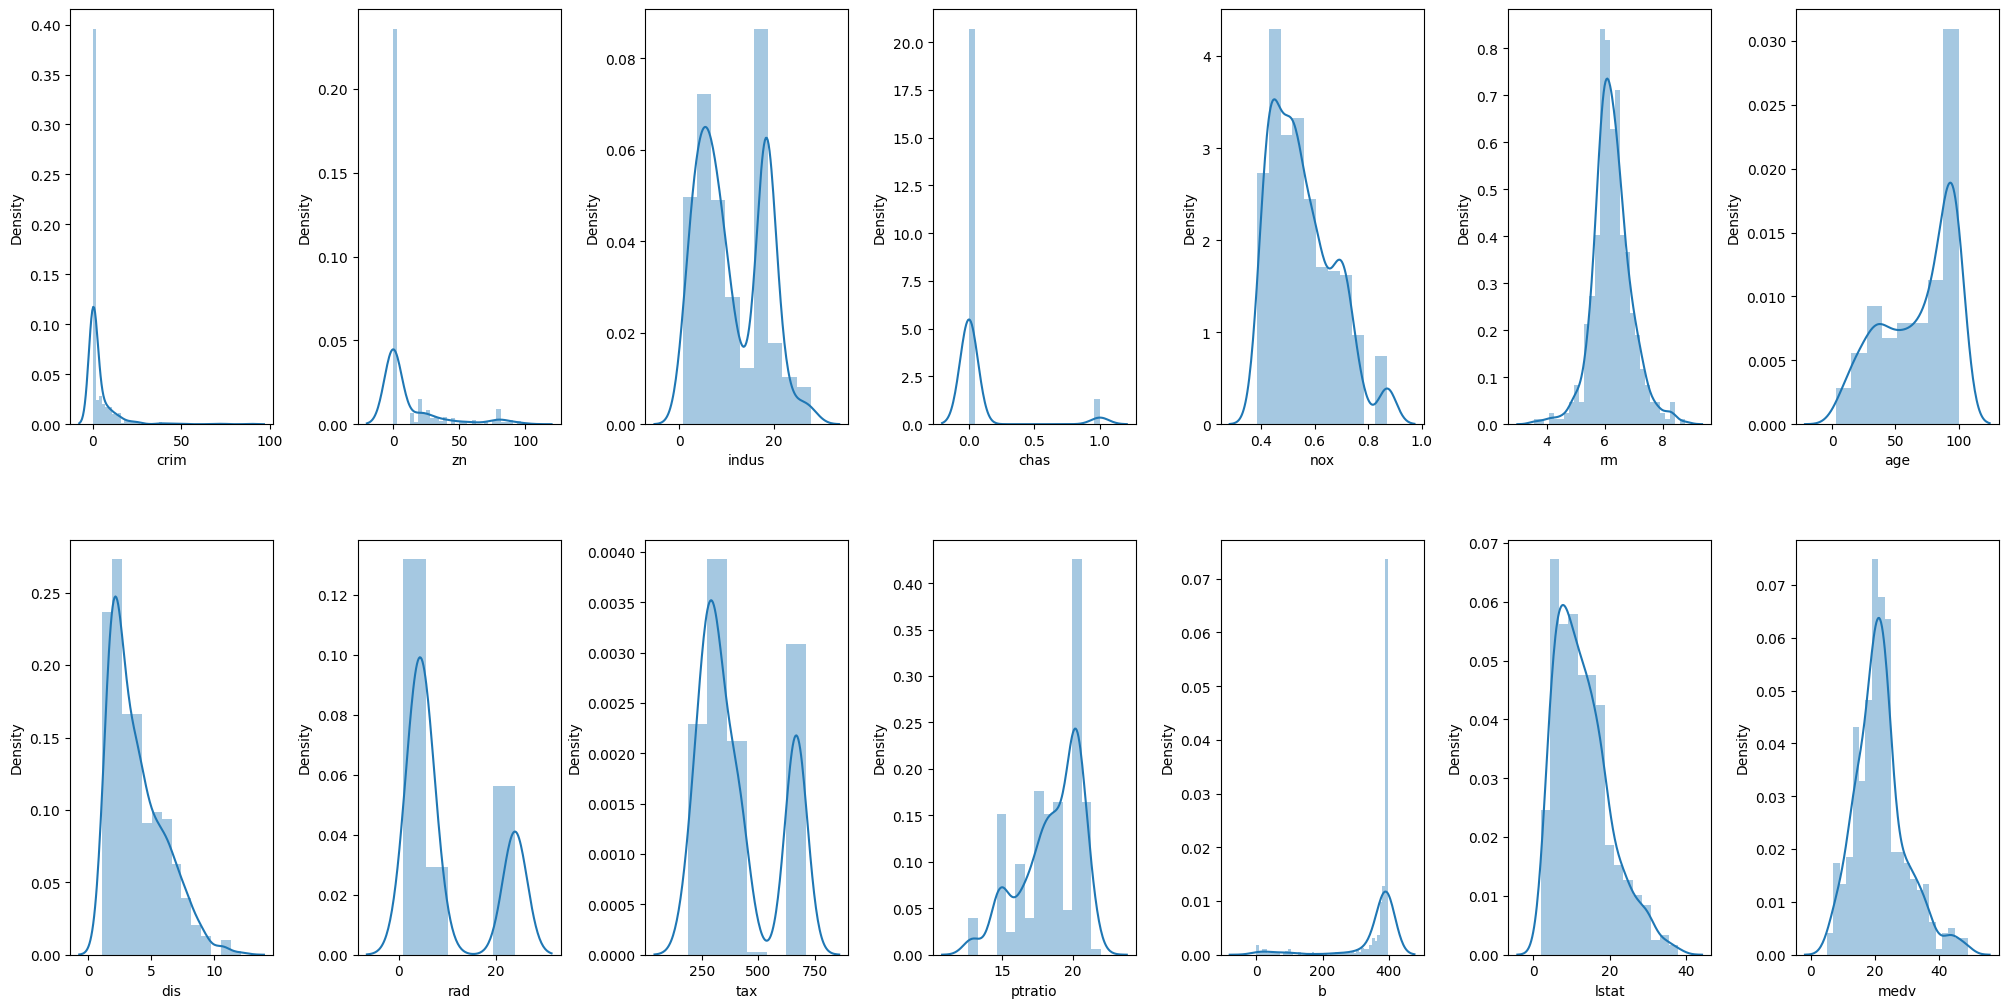

In [ ]:
fig, axs = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v,ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)


In [ ]:
#the histogram shows that coloums crim,zn,chas,b have highly skewed ditribution
# aslso the medv look to have normal distribution for the other coloumns

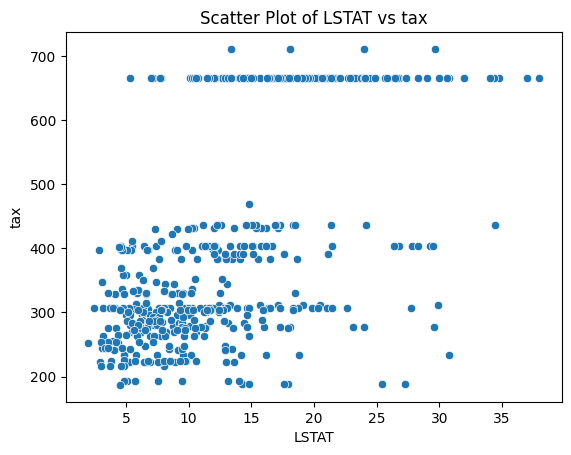

In [ ]:
sns.scatterplot(x='lstat', y='tax', data=data)
plt.title('Scatter Plot of LSTAT vs tax')
plt.xlabel('LSTAT')
plt.ylabel('tax')
plt.show()

<Axes: >

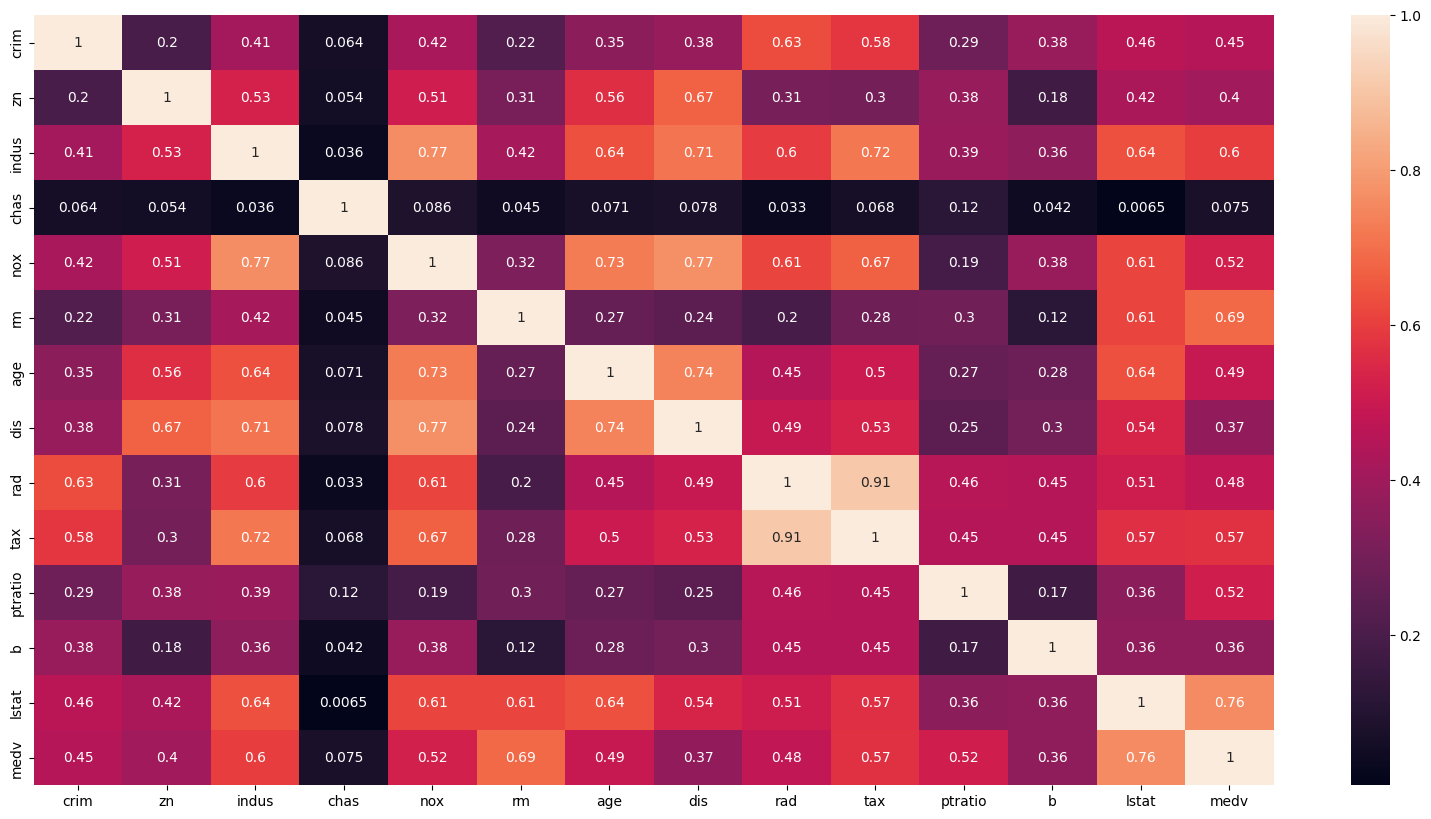

In [ ]:
#let's plot the pairwise correlation on data.

plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

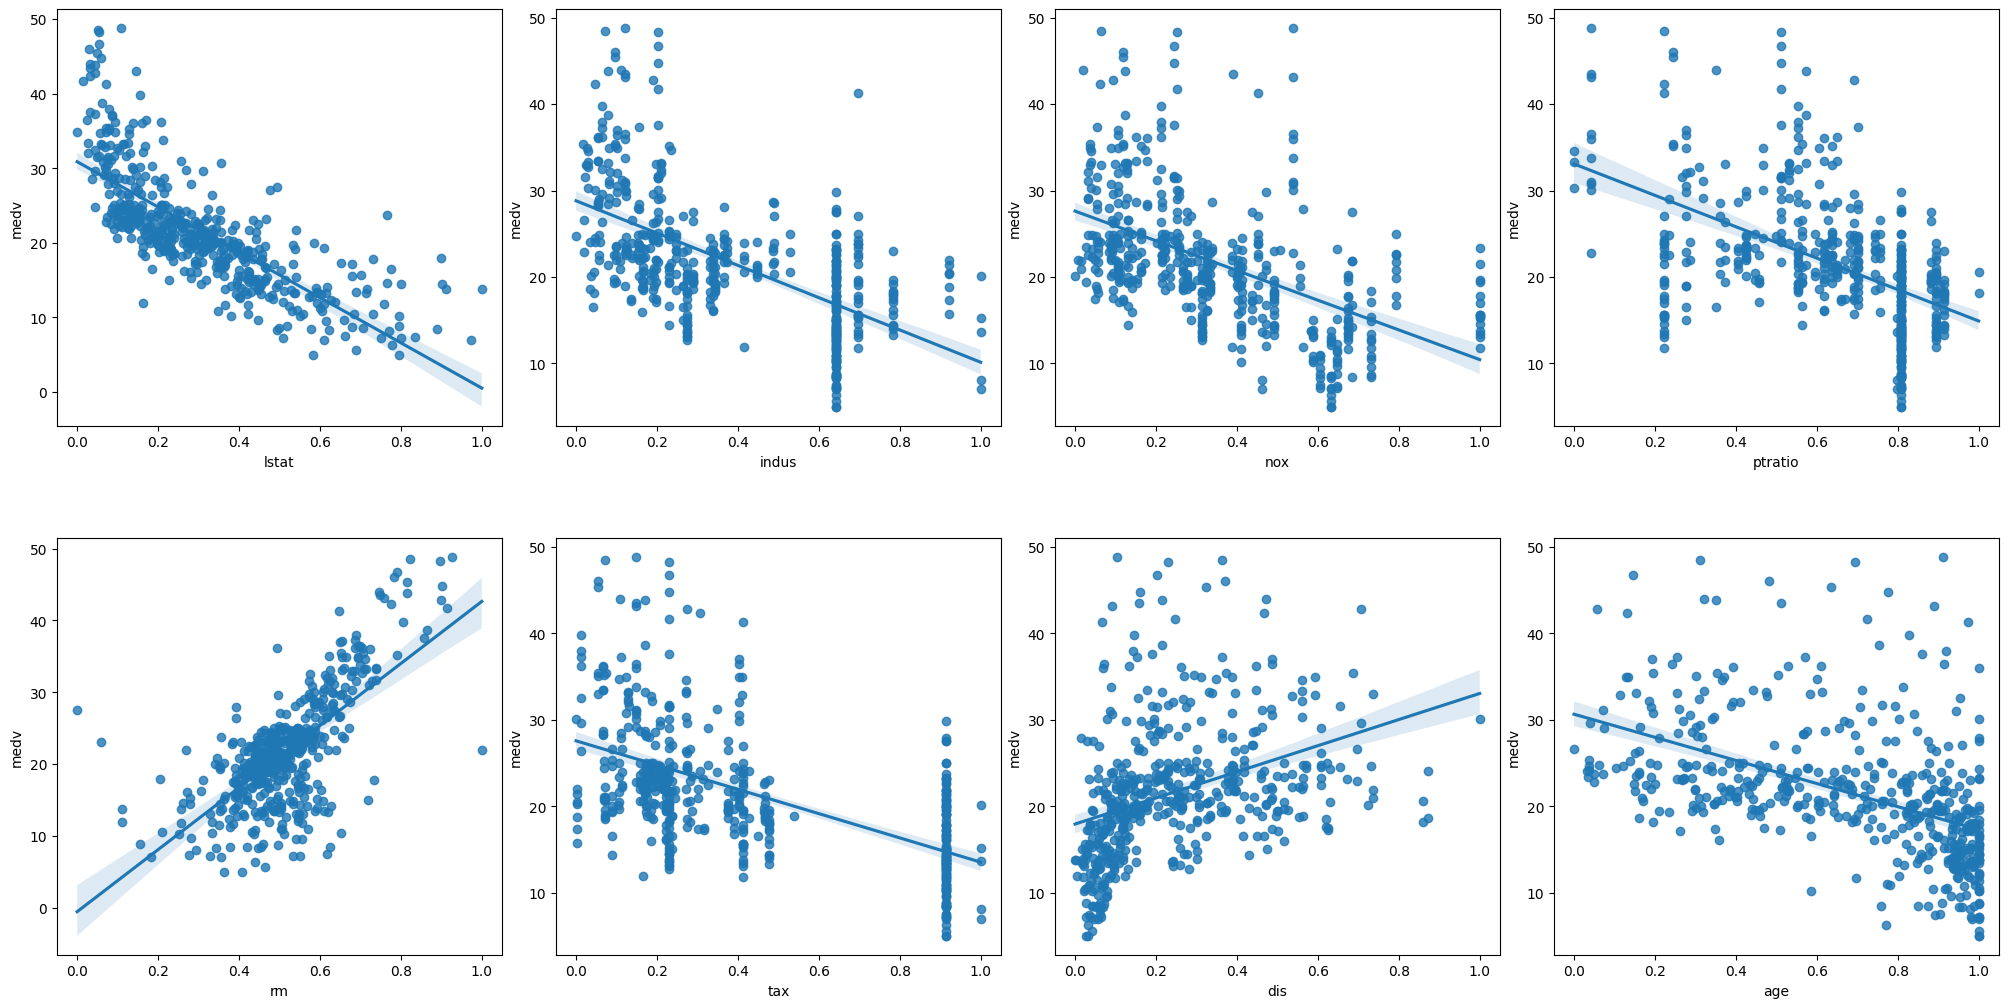

In [21]:
from sklearn import preprocessing
#lets scale the coloumns before plotting them against medv
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ["lstat","indus","nox","ptratio","rm","tax","dis","age"]
x = data.loc[:,column_sels]
y= data["medv"]
x=pd.DataFrame(min_max_scaler.fit_transform(x),columns=column_sels)
fig, axs = plt.subplots(ncols=4,nrows=2,figsize=(20,10))
index = 0
axs = axs.flatten()
for i,k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)